# Reading the main data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('project_dataset_5K.csv')

In [3]:
df

,X_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,X_PSU,CTELENM1,...,X_CLNSCPY,X_SGMSCPY,X_SGMS10Y,X_RFBLDS4,X_STOLDNA,X_VIRCOLN,X_SBONTIM,X_CRCREC1,X_AIDTST4,Class
0,1,3,3042020,3,4,2020,1100,2020000058,2020000058,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,N
1,1,3,3052020,3,5,2020,1100,2020000296,2020000296,1.0,...,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,N
2,1,1,1072020,1,7,2020,1100,2020000324,2020000324,1.0,...,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,Y
3,1,2,2172020,2,17,2020,1100,2020000362,2020000362,1.0,...,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,Y
4,1,2,2052020,2,5,2020,1100,2020000366,2020000366,1.0,...,1.0,3.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,72,9,1312021,1,31,2021,1100,2020004294,2020004294,NaN,...,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,N
4996,72,11,2252021,2,25,2021,1100,2020004489,2020004489,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N
4997,72,11,3182021,3,18,2021,1100,2020004494,2020004494,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N
4998,72,11,2132021,2,13,2021,1100,2020004596,2020004596,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N


In [4]:
duplicate_rows = df.duplicated()
print(duplicate_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool


In [5]:
print(df.describe())

           X_STATE       FMONTH         IDATE       IMONTH         IDAY  \
count  5000.000000  5000.000000  5.000000e+03  5000.000000  5000.000000   
mean     30.041400     5.897000  6.593158e+06     6.441000    15.013800   
std      15.501269     3.493942  3.438121e+06     3.441698     8.442598   
min       1.000000     1.000000  1.012021e+06     1.000000     1.000000   
25%      19.000000     3.000000  3.262020e+06     3.000000     8.000000   
50%      29.000000     5.000000  6.202020e+06     6.000000    15.000000   
75%      41.000000     9.000000  1.003202e+07    10.000000    22.000000   
max      72.000000    12.000000  1.231202e+07    12.000000    31.000000   

             IYEAR     DISPCODE         SEQNO         X_PSU  CTELENM1  ...  \
count  5000.000000  5000.000000  5.000000e+03  5.000000e+03    1527.0  ...   
mean   2020.029600  1118.280000  2.020005e+09  2.020005e+09       1.0  ...   
std       0.169498    38.654113  3.428231e+03  3.428231e+03       0.0  ...   
min    2020.

In [6]:
print("Number of rows:", len(df))
print("Number of columns (variables in the survey):", len(df.columns))
print(df.columns)

Number of rows: 5000
Number of columns (variables in the survey): 276
Index(['X_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', 'X_PSU', 'CTELENM1',
       ...
       'X_CLNSCPY', 'X_SGMSCPY', 'X_SGMS10Y', 'X_RFBLDS4', 'X_STOLDNA',
       'X_VIRCOLN', 'X_SBONTIM', 'X_CRCREC1', 'X_AIDTST4', 'Class'],
      dtype='object', length=276)


In [7]:
# Sort columns alphabetically
df = df.reindex(sorted(df.columns), axis=1)

# Remove duplicate columns by keeping the first occurrence (if any duplicates exist)
df = df.loc[:,~df.columns.duplicated()]

In [8]:
# Assuming df is your DataFrame
#print(df.columns.tolist())

In [9]:
# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

#print("\nNumerical Features:")
#for col in numerical_columns:
    #print(col)

#to see the number of unique values for numerical features too, you can add:
#for col in numerical_columns:
    #print(f"{col}: {len(df[col].unique())} unique values")

Categorical Features:
Class: ['N' 'Y']


In [10]:
columns_with_nan = df.columns[df.isna().any()].tolist()
nan_distribution = df[columns_with_nan].isna().sum()
nan_distribution

ACEDEPRS     3372
ACEDIVRC     3374
ACEDRINK     3372
ACEDRUGS     3374
ACEHURT1     3378
             ... 
X_SGMS10Y    2843
X_SGMSCPY    2843
X_STOLDNA    2773
X_URBSTAT      77
X_VIRCOLN    2798
Length: 197, dtype: int64

# Smoothing the data

In [11]:
# Define the threshold for deletion (0.60 means we drop rows with 60% missing values)
threshold = 0.60

# Calculate the minimum number of non-NA values required to keep a row
min_count = int((1 - threshold) * df.shape[1])

# Drop rows with less than min_count non-NA values
df = df.dropna(axis=0, thresh=min_count)

# Print the shapes of the original and updated DataFrames
print(f"DataFrame shape after deletion: {df.shape}")

# Print the first few rows of the updated DataFrame
df

DataFrame shape after deletion: (4842, 276)


,ACEDEPRS,ACEDIVRC,ACEDRINK,ACEDRUGS,ACEHURT1,ACEHVSEX,ACEPRISN,ACEPUNCH,ACESWEAR,ACETOUCH,...,X_SGMSCPY,X_SMOKER3,X_STATE,X_STOLDNA,X_STRWT,X_STSTR,X_TOTINDA,X_URBSTAT,X_VIRCOLN,X_WT2RAKE
0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,NaN,4,1,NaN,69.640207,11011,2,1.0,NaN,69.640207
1,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,3.0,3,1,3.0,41.203795,11051,1,1.0,3.0,82.407589
2,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,3.0,2,1,3.0,78.535751,11062,2,2.0,3.0,235.607253
3,1.0,2.0,1.0,1.0,3.0,3.0,1.0,3.0,3.0,3.0,...,3.0,1,1,3.0,19.172029,11061,2,2.0,3.0,19.172029
4,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,3.0,3,1,3.0,19.172029,11061,1,2.0,3.0,19.172029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,4,72,3.0,169.274315,722019,1,NaN,3.0,169.274315
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4,72,NaN,169.274315,722019,2,NaN,NaN,169.274315
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4,72,NaN,169.274315,722019,1,NaN,NaN,169.274315
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3,72,NaN,169.274315,722019,1,NaN,NaN,169.274315


# Creating another csv file having relevant columns 

In [11]:
import pandas as pd

# Assuming 'df' is your pandas DataFrame

# List of columns you want to keep regardless of their missing value percentage
columns_to_keep = ['ACEDEPRS', 'ACEDRUGS', 'ACEDRINK', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX']

# Calculating the number of rows in the DataFrame
new_nrows = len(df)

# Calculating the number of missing values per column
val_missing = df.isna().sum()

# Calculating the percentage of missing values per column
missing_per_wt = (val_missing / new_nrows) * 100

# Creating a DataFrame with the missing values percentage
missing_val_df = pd.DataFrame({
    'column_name': missing_per_wt.index,
    'missing_percentage': missing_per_wt.values
})

# Identifying columns with more than 30% missing values and not in columns_to_keep
cols_to_drop = missing_val_df[(missing_val_df['missing_percentage'] > 30) & (~missing_val_df['column_name'].isin(columns_to_keep))]['column_name']

# Dropping these columns from the DataFrame, while keeping the specified columns
df = df.drop(columns=cols_to_drop)

# Now df will have dropped columns based on missing value criteria but retained the specified columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4842 entries, 0 to 4999
Columns: 121 entries, ACEDEPRS to X_WT2RAKE
dtypes: float64(47), int64(73), object(1)
memory usage: 4.5+ MB
None


In [24]:
# Writing the modified DataFrame to a CSV file without missing values and without row indices
df.to_csv('modified_file.csv', index=False, na_rep='')

In [12]:
data = pd.read_csv('modified_file.csv')
data

,ACEDEPRS,ACEDIVRC,ACEDRINK,ACEDRUGS,ACEHURT1,ACEHVSEX,ACEPRISN,ACEPUNCH,ACESWEAR,ACETOUCH,...,X_RFSEAT3,X_RFSMOK3,X_SEX,X_SMOKER3,X_STATE,X_STRWT,X_STSTR,X_TOTINDA,X_URBSTAT,X_WT2RAKE
0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1,1,2,4,1,69.640207,11011,2,1.0,69.640207
1,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,2,1,1,3,1,41.203795,11051,1,1.0,82.407589
2,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,1,2,2,2,1,78.535751,11062,2,2.0,235.607253
3,1.0,2.0,1.0,1.0,3.0,3.0,1.0,3.0,3.0,3.0,...,1,2,2,1,1,19.172029,11061,2,2.0,19.172029
4,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1,1,1,3,1,19.172029,11061,1,2.0,19.172029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,1,1,4,72,169.274315,722019,1,NaN,169.274315
4838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,1,2,4,72,169.274315,722019,2,NaN,169.274315
4839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,2,4,72,169.274315,722019,1,NaN,169.274315
4840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,2,3,72,169.274315,722019,1,NaN,169.274315


In [13]:
print(data.columns.tolist())

['ACEDEPRS', 'ACEDIVRC', 'ACEDRINK', 'ACEDRUGS', 'ACEHURT1', 'ACEHVSEX', 'ACEPRISN', 'ACEPUNCH', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ALCDAY5', 'ASTHMA3', 'BLIND', 'CHCCOPD2', 'CHCKDNY2', 'CHCOCNCR', 'CHCSCNCR', 'CHECKUP1', 'CHILDREN', 'CPDEMO1B', 'CVDCRHD4', 'CVDINFR4', 'CVDSTRK3', 'Class', 'DEAF', 'DECIDE', 'DIABETE4', 'DIFFALON', 'DIFFDRES', 'DIFFWALK', 'DISPCODE', 'DRNKANY5', 'DROCDY3_', 'EDUCA', 'EMPLOY1', 'EXERANY2', 'FLUSHOT7', 'FMONTH', 'GENHLTH', 'HAVARTH4', 'HEIGHT3', 'HIVRISK5', 'HIVTST7', 'HLTHPLN1', 'HTIN4', 'HTM4', 'IDATE', 'IDAY', 'IMONTH', 'INCOME2', 'IYEAR', 'LASTDEN4', 'MARITAL', 'MEDCOST', 'PERSDOC2', 'PHYSHLTH', 'PNEUVAC4', 'QSTLANG', 'QSTVER', 'RENTHOM1', 'RMVTETH4', 'SEATBELT', 'SEQNO', 'SEXVAR', 'SLEPTIM1', 'SMOKE100', 'USENOW3', 'VETERAN3', 'WEIGHT2', 'WTKG3', 'X_AGE65YR', 'X_AGE80', 'X_AGEG5YR', 'X_AGE_G', 'X_AIDTST4', 'X_ASTHMS1', 'X_BMI5', 'X_BMI5CAT', 'X_CASTHM1', 'X_CHLDCNT', 'X_DENVST3', 'X_DRDXAR2', 'X_DRNKDRV', 'X_DRNKWK1', 'X_DUALUSE', 'X_EDUCAG', 'X_EX

# Important Column Selection

In [49]:

'''# Columns to add from 'df' to 'data'
columns_to_add = ['ACEDEPRS', 'ACEDRUGS', 'ACEDRINK', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX']

# Extract the columns from 'df'
extracted_columns = df[columns_to_add]

# Concatenate the extracted columns with 'data'
data = pd.concat([data, extracted_columns], axis=1)'''

"# Columns to add from 'df' to 'data'\ncolumns_to_add = ['ACEDEPRS', 'ACEDRUGS', 'ACEDRINK', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX']\n\n# Extract the columns from 'df'\nextracted_columns = df[columns_to_add]\n\n# Concatenate the extracted columns with 'data'\ndata = pd.concat([data, extracted_columns], axis=1)"

In [14]:
data

,ACEDEPRS,ACEDIVRC,ACEDRINK,ACEDRUGS,ACEHURT1,ACEHVSEX,ACEPRISN,ACEPUNCH,ACESWEAR,ACETOUCH,...,X_RFSEAT3,X_RFSMOK3,X_SEX,X_SMOKER3,X_STATE,X_STRWT,X_STSTR,X_TOTINDA,X_URBSTAT,X_WT2RAKE
0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1,1,2,4,1,69.640207,11011,2,1.0,69.640207
1,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,2,1,1,3,1,41.203795,11051,1,1.0,82.407589
2,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,1,2,2,2,1,78.535751,11062,2,2.0,235.607253
3,1.0,2.0,1.0,1.0,3.0,3.0,1.0,3.0,3.0,3.0,...,1,2,2,1,1,19.172029,11061,2,2.0,19.172029
4,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1,1,1,3,1,19.172029,11061,1,2.0,19.172029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,1,1,4,72,169.274315,722019,1,NaN,169.274315
4838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,1,2,4,72,169.274315,722019,2,NaN,169.274315
4839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,2,4,72,169.274315,722019,1,NaN,169.274315
4840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,2,3,72,169.274315,722019,1,NaN,169.274315


In [15]:
data.drop(['WEIGHT2','ALCDAY5','IDATE', 'IMONTH','IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', 'X_PSU','X_MRACE1','X_PRACE1','X_RACEG21','X_RACEGR3','X_RACEGR3','X_DRNKDRV','X_RFSEAT3','X_RFSEAT2','X_RAWRAKE','X_RACEGR3','CHILDREN','CPDEMO1B','CVDCRHD4','DIFFALON','DIFFDRES','DIFFWALK','DROCDY3_','DROCDY3_','EXERANY2','FMONTH','HIVTST7','HEIGHT3','HTM4','QSTLANG','QSTVER','RMVTETH4','SEATBELT','WTKG3','X_AGE80','X_AGE65YR','X_AGEG5YR','X_BMI5','X_LLCPWT','X_LLCPWT2','X_DRNKWK1','X_STRWT','X_STSTR','X_WT2RAKE'], axis=1, inplace=True)
data

,ACEDEPRS,ACEDIVRC,ACEDRINK,ACEDRUGS,ACEHURT1,ACEHVSEX,ACEPRISN,ACEPUNCH,ACESWEAR,ACETOUCH,...,X_RFBING5,X_RFBMI5,X_RFDRHV7,X_RFHLTH,X_RFSMOK3,X_SEX,X_SMOKER3,X_STATE,X_TOTINDA,X_URBSTAT
0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1,1,1,2,1,2,4,1,2,1.0
1,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1,1,1,1,1,1,3,1,1,1.0
2,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,1,2,1,2,2,2,2,1,2,2.0
3,1.0,2.0,1.0,1.0,3.0,3.0,1.0,3.0,3.0,3.0,...,1,2,1,2,2,2,1,1,2,2.0
4,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1,2,1,1,1,1,3,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,1,1,1,1,4,72,1,NaN
4838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,1,1,1,2,4,72,2,NaN
4839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,9,1,1,1,2,4,72,1,NaN
4840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,1,1,1,2,3,72,1,NaN


# Adding "DIFFWALK" to the dataframe which we got from the correlation and droping the column name "X_RACEPRV"

In [16]:
columns_to_add = ['DIFFWALK']
# Extract the columns from 'df'
extracted_columns = df[columns_to_add]

# Concatenate the extracted columns with 'data'
data = pd.concat([data, extracted_columns], axis=1)

data.drop(['X_RACEPRV'], axis=1, inplace=True)
data

,ACEDEPRS,ACEDIVRC,ACEDRINK,ACEDRUGS,ACEHURT1,ACEHVSEX,ACEPRISN,ACEPUNCH,ACESWEAR,ACETOUCH,...,X_RFBMI5,X_RFDRHV7,X_RFHLTH,X_RFSMOK3,X_SEX,X_SMOKER3,X_STATE,X_TOTINDA,X_URBSTAT,DIFFWALK
0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,1.0
1,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0
2,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
3,1.0,2.0,1.0,1.0,3.0,3.0,1.0,3.0,3.0,3.0,...,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
4,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,2.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [17]:
print(data.columns.tolist())

['ACEDEPRS', 'ACEDIVRC', 'ACEDRINK', 'ACEDRUGS', 'ACEHURT1', 'ACEHVSEX', 'ACEPRISN', 'ACEPUNCH', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ASTHMA3', 'BLIND', 'CHCCOPD2', 'CHCKDNY2', 'CHCOCNCR', 'CHCSCNCR', 'CHECKUP1', 'CVDINFR4', 'CVDSTRK3', 'Class', 'DEAF', 'DECIDE', 'DIABETE4', 'DRNKANY5', 'EDUCA', 'EMPLOY1', 'FLUSHOT7', 'GENHLTH', 'HAVARTH4', 'HIVRISK5', 'HLTHPLN1', 'HTIN4', 'INCOME2', 'LASTDEN4', 'MARITAL', 'MEDCOST', 'PERSDOC2', 'PHYSHLTH', 'PNEUVAC4', 'RENTHOM1', 'SEXVAR', 'SLEPTIM1', 'SMOKE100', 'USENOW3', 'VETERAN3', 'X_AGE_G', 'X_AIDTST4', 'X_ASTHMS1', 'X_BMI5CAT', 'X_CASTHM1', 'X_CHLDCNT', 'X_DENVST3', 'X_DRDXAR2', 'X_DUALUSE', 'X_EDUCAG', 'X_EXTETH3', 'X_HCVU651', 'X_HISPANC', 'X_IMPRACE', 'X_INCOMG', 'X_LTASTH1', 'X_METSTAT', 'X_MICHD', 'X_PHYS14D', 'X_RACE', 'X_RFBING5', 'X_RFBMI5', 'X_RFDRHV7', 'X_RFHLTH', 'X_RFSMOK3', 'X_SEX', 'X_SMOKER3', 'X_STATE', 'X_TOTINDA', 'X_URBSTAT', 'DIFFWALK']


In [18]:
# Checking the number of categorical and numerical columns
num_categorical = data.select_dtypes(include=['category', 'object']).shape[1]
num_numerical = data.select_dtypes(include=[np.number, 'bool']).shape[1]

print(f"Number of Categorical Columns: {num_categorical}")
print(f"Number of Numerical Columns: {num_numerical}")

Number of Categorical Columns: 1
Number of Numerical Columns: 76


In [19]:
num_categorical = df.select_dtypes(include=['category', 'object']).columns.tolist()
print("Categorical Column Names:", num_categorical)

Categorical Column Names: ['Class']


# The numeric and categorical columns can be found using the plots as well so let's found the columns using histogram or any other plots 

# Manipulating the column values

In [20]:
import pandas as pd
import numpy as np

# Initialize an empty list to store column names containing 9 as a unique value
columns_with_9_as_unique_value = []

# Iterate over each column in the DataFrame
for col in data.columns:
    # Get the unique values of the column
    unique_values = data[col].unique()
    # Check if 9 is one of the unique values
    if 9 in unique_values:
        # If yes, append the column name to the list
        columns_with_9_as_unique_value.append(col)

# Print the column names that contain 9 as a unique value
print("Column names containing 9 as an unique value:")
for column_name in columns_with_9_as_unique_value:
    print(column_name)

Column names containing 9 as an unique value:
ACEDEPRS
ACEDIVRC
ACEDRINK
ACEDRUGS
ACEHURT1
ACEHVSEX
ACEPRISN
ACEPUNCH
ACESWEAR
ACETOUCH
ACETTHEM
BLIND
CHCCOPD2
CHCOCNCR
CHECKUP1
CVDINFR4
CVDSTRK3
DEAF
DECIDE
DRNKANY5
EDUCA
EMPLOY1
FLUSHOT7
GENHLTH
HAVARTH4
HIVRISK5
HLTHPLN1
LASTDEN4
MARITAL
MEDCOST
PERSDOC2
PHYSHLTH
PNEUVAC4
RENTHOM1
SLEPTIM1
SMOKE100
USENOW3
VETERAN3
X_AIDTST4
X_ASTHMS1
X_CASTHM1
X_CHLDCNT
X_DENVST3
X_DUALUSE
X_EDUCAG
X_EXTETH3
X_HCVU651
X_HISPANC
X_INCOMG
X_LTASTH1
X_PHYS14D
X_RACE
X_RFBING5
X_RFBMI5
X_RFDRHV7
X_RFHLTH
X_RFSMOK3
X_SMOKER3
X_STATE
X_TOTINDA
DIFFWALK


In [21]:
import pandas as pd
import numpy as np

# Initialize an empty list to store column names containing values greater than 50
columns_with_values_greater_than_50 = []

# Iterate over each numeric column in the DataFrame
for col in data.select_dtypes(include=np.number).columns:
    # Check if any value in the column is greater than 50
    if any(data[col] > 50):
        # If yes, append the column name to the list
        columns_with_values_greater_than_50.append(col)

# Print the column names that contain values greater than 50
print("Column names containing values greater than 50:")
for column_name in columns_with_values_greater_than_50:
    print(column_name)

Column names containing values greater than 50:
HTIN4
INCOME2
PHYSHLTH
SLEPTIM1
X_STATE


In [22]:
# Columns to apply general replacements (77 to 9 and 99 to 9)
columns_to_replace = ['INCOME2', 'PHYSHLTH', 'SLEPTIM1']

# Apply general replacements for 77 and 99 in the specified columns
for col in columns_to_replace:
    data[col] = data[col].replace({77: 9, 99: 9})

# Additionally, replace 88 with 9 specifically in the 'PHYSHLTH' column
data['PHYSHLTH'] = data['PHYSHLTH'].replace({88: 9})

# Verify the replacements
print("Unique values in 'INCOME2' after replacements:")
print(data['INCOME2'].unique())
print("Unique values in 'PHYSHLTH' after replacements:")
print(data['PHYSHLTH'].unique())

Unique values in 'INCOME2' after replacements:
[ 5.  8.  6.  1.  9.  2.  7.  3.  4. nan]
Unique values in 'PHYSHLTH' after replacements:
[ 9.  1. 30.  7.  2.  5.  3. 10. 20.  4. 13. 15. 25.  6. 14. 21. 28.  8.
 16. 12. 22. 18. 11. 24. 17. 29. 27. 19. 26. nan]


# Changing the class lable from 'Y', 'N' to 1 and 0

In [23]:
# Changing 'Class' labels from 'Y'/'N' to 1/0
data['Class'] = data['Class'].map({'Y': 1, 'N': 0})

# Moving 'Class' column to the end
class_column = data.pop('Class')  # Remove the 'Class' column and store it
data['Class'] = class_column  # Add 'Class' column back at the end
data

,ACEDEPRS,ACEDIVRC,ACEDRINK,ACEDRUGS,ACEHURT1,ACEHVSEX,ACEPRISN,ACEPUNCH,ACESWEAR,ACETOUCH,...,X_RFDRHV7,X_RFHLTH,X_RFSMOK3,X_SEX,X_SMOKER3,X_STATE,X_TOTINDA,X_URBSTAT,DIFFWALK,Class
0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,1.0,0.0
1,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,0.0
2,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
3,1.0,2.0,1.0,1.0,3.0,3.0,1.0,3.0,3.0,3.0,...,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0
4,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [24]:
nan_count = data.isna().sum()
print(nan_count)

ACEDEPRS     3368
ACEDIVRC     3370
ACEDRINK     3368
ACEDRUGS     3370
ACEHURT1     3374
             ... 
X_STATE       154
X_TOTINDA     154
X_URBSTAT     228
DIFFWALK      193
Class         154
Length: 77, dtype: int64


In [25]:
# Checking for columns with more than a certain number of missing values (e.g., 2000)
missing_value_threshold = 2500
columns_with_many_missing = data.columns[data.isnull().sum() > missing_value_threshold]

print("Columns with more than 2000 missing values:", columns_with_many_missing.tolist())

Columns with more than 2000 missing values: ['ACEDEPRS', 'ACEDIVRC', 'ACEDRINK', 'ACEDRUGS', 'ACEHURT1', 'ACEHVSEX', 'ACEPRISN', 'ACEPUNCH', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM']


# Removing outliers using Z_score

When used the typical method for removing outliers I got only 76 rows from 5000 rows, so I used Z score method for the outlier removal

In [26]:
import numpy as np

# Calculate the mean and standard deviation for each column
mean_values = data.mean()
std_values = data.std()

# Define the threshold for identifying outliers
threshold = 9

# Calculate the Z-score for each data point in the DataFrame
z_scores = (data - mean_values) / std_values

# Identify outliers based on the threshold for each column
outlier_mask = (z_scores > threshold) | (z_scores < -threshold)

# Count the number of outliers in each column
num_outliers_per_column = outlier_mask.sum(axis=0)

# Print the number of outliers for each column
for col, num_outliers in zip(data.columns, num_outliers_per_column):
    print(f"Number of outliers in column '{col}': {num_outliers}")

# Count the total number of data points considered as outliers
total_outliers = num_outliers_per_column.sum()

# Print the total number of data points considered as outliers
#print("Total number of data points considered as outliers:", total_outliers)

# Remove outliers from the DataFrame
cleaned_data = data[~outlier_mask.any(axis=1)]

# Print the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", cleaned_data.shape)

Number of outliers in column 'ACEDEPRS': 0
Number of outliers in column 'ACEDIVRC': 0
Number of outliers in column 'ACEDRINK': 0
Number of outliers in column 'ACEDRUGS': 0
Number of outliers in column 'ACEHURT1': 0
Number of outliers in column 'ACEHVSEX': 0
Number of outliers in column 'ACEPRISN': 0
Number of outliers in column 'ACEPUNCH': 0
Number of outliers in column 'ACESWEAR': 0
Number of outliers in column 'ACETOUCH': 0
Number of outliers in column 'ACETTHEM': 0
Number of outliers in column 'ASTHMA3': 9
Number of outliers in column 'BLIND': 7
Number of outliers in column 'CHCCOPD2': 13
Number of outliers in column 'CHCKDNY2': 16
Number of outliers in column 'CHCOCNCR': 15
Number of outliers in column 'CHCSCNCR': 13
Number of outliers in column 'CHECKUP1': 0
Number of outliers in column 'CVDINFR4': 14
Number of outliers in column 'CVDSTRK3': 10
Number of outliers in column 'DEAF': 14
Number of outliers in column 'DECIDE': 32
Number of outliers in column 'DIABETE4': 0
Number of out

# Data Imputation using Mode, Mice and KNN Imputer

In [27]:
from sklearn.impute import SimpleImputer, KNNImputer

# Column to impute with KNN
knn_impute_column = 'HTIN4'

# Assume df is your DataFrame with 77 columns
all_columns = cleaned_data.columns.tolist()

# Remove 'HTIN4' from the list of columns for mode imputation
mode_impute_columns = [col for col in all_columns if col != knn_impute_column]

# Initialize the SimpleImputer for mode imputation
mode_imputer = SimpleImputer(strategy='most_frequent')

# Perform mode imputation on the specified columns
cleaned_data[mode_impute_columns] = mode_imputer.fit_transform(cleaned_data[mode_impute_columns])

# Initialize the KNN imputer
knn_imputer = KNNImputer()

# Perform KNN imputation on the 'HTIN4' column
# Note: Ensure 'HTIN4' column is in a 2D array format for fitting
cleaned_data[[knn_impute_column]] = knn_imputer.fit_transform(cleaned_data[[knn_impute_column]])

# Check the shape of the cleaned and imputed DataFrame
print("Shape of cleaned and imputed DataFrame:", cleaned_data.shape)
cleaned_data.head()

C:\Users\shrad\AppData\Local\Temp\ipykernel_7928\2264790704.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[mode_impute_columns] = mode_imputer.fit_transform(cleaned_data[mode_impute_columns])


Shape of cleaned and imputed DataFrame: (4736, 77)


C:\Users\shrad\AppData\Local\Temp\ipykernel_7928\2264790704.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[[knn_impute_column]] = knn_imputer.fit_transform(cleaned_data[[knn_impute_column]])


,ACEDEPRS,ACEDIVRC,ACEDRINK,ACEDRUGS,ACEHURT1,ACEHVSEX,ACEPRISN,ACEPUNCH,ACESWEAR,ACETOUCH,...,X_RFDRHV7,X_RFHLTH,X_RFSMOK3,X_SEX,X_SMOKER3,X_STATE,X_TOTINDA,X_URBSTAT,DIFFWALK,Class
0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,1.0,0.0
1,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,0.0
2,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
3,1.0,2.0,1.0,1.0,3.0,3.0,1.0,3.0,3.0,3.0,...,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0
4,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,0.0


In [48]:
'''from sklearn.impute import SimpleImputer

# Columns to impute with mode
mode_impute_columns = ['HTIN4', 'PHYSHLTH', 'SLEPTIM1', 'X_STATE']

# Columns to impute with MICE
mice_impute_columns = ['ACEDEPRS', 'ACEDRUGS', 'ACEDRINK', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX']

# Initialize the SimpleImputer for mode imputation
mode_imputer = SimpleImputer(strategy='most_frequent')

# Perform mode imputation on the specified columns
for column in mode_impute_columns:
    cleaned_data[column] = mode_imputer.fit_transform(cleaned_data[[column]])

# Initialize the MICE imputer
mice_imputer = IterativeImputer()

# Perform MICE imputation on the specified columns
cleaned_data[mice_impute_columns] = mice_imputer.fit_transform(cleaned_data[mice_impute_columns])

# Check the shape of the cleaned and imputed DataFrame
print("Shape of cleaned and imputed DataFrame:", cleaned_data.shape)
cleaned_data.head()'''

Shape of cleaned and imputed DataFrame: (4592, 77)


C:\Users\shrad\AppData\Local\Temp\ipykernel_14280\1571542887.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[column] = mode_imputer.fit_transform(cleaned_data[[column]])
C:\Users\shrad\AppData\Local\Temp\ipykernel_14280\1571542887.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[column] = mode_imputer.fit_transform(cleaned_data[[column]])
C:\Users\shrad\AppData\Local\Temp\ipykernel_14280\1571542887.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,ACEDEPRS,ACEDIVRC,ACEDRINK,ACEDRUGS,ACEHURT1,ACEHVSEX,ACEPRISN,ACEPUNCH,ACESWEAR,ACETOUCH,...,X_RFBMI5,X_RFDRHV7,X_RFHLTH,X_RFSMOK3,X_SEX,X_SMOKER3,X_STATE,X_TOTINDA,X_URBSTAT,Class
0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1,1,2,1,2,4,1,2,1.0,0
1,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1,1,1,1,1,3,1,1,1.0,0
2,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,2,1,2,2,2,2,1,2,2.0,1
3,1.0,2.0,1.0,1.0,3.0,3.0,1.0,3.0,3.0,3.0,...,2,1,2,2,2,1,1,2,2.0,1
4,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,2,1,1,1,1,3,1,1,2.0,0


In [49]:
'''from sklearn.impute import KNNImputer

# Assuming 'cleaned_data' is defined and includes columns for the dataset

# Define the columns to exclude from KNN imputation
exclude_columns = ['ACEDEPRS', 'ACEDRUGS', 'ACEDRINK', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX']

# Identify the columns to include in KNN imputation
columns_to_impute_knn = cleaned_data.columns.difference(exclude_columns)

# Initialize the KNN imputer
knn_imputer = KNNImputer()

# Perform KNN imputation on the specified columns
# Note: .loc[:, columns_to_impute_knn] ensures we're only selecting the columns to impute
cleaned_data.loc[:, columns_to_impute_knn] = knn_imputer.fit_transform(cleaned_data[columns_to_impute_knn])

# Verify the operation
print("KNN Imputation completed. Updated DataFrame shape:", cleaned_data.shape)'''

KNN Imputation completed. Updated DataFrame shape: (4592, 77)


C:\Users\shrad\AppData\Local\Temp\ipykernel_14280\203577680.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.loc[:, columns_to_impute_knn] = knn_imputer.fit_transform(cleaned_data[columns_to_impute_knn])


In [50]:
nan_count = cleaned_data.isna().sum()
print(nan_count)

ACEDEPRS     0
ACEDIVRC     0
ACEDRINK     0
ACEDRUGS     0
ACEHURT1     0
            ..
X_SMOKER3    0
X_STATE      0
X_TOTINDA    0
X_URBSTAT    0
Class        0
Length: 77, dtype: int64


In [24]:
cleaned_data.head(20)

,ACEDEPRS,ACEDIVRC,ACEDRINK,ACEDRUGS,ACEHURT1,ACEHVSEX,ACEPRISN,ACEPUNCH,ACESWEAR,ACETOUCH,...,X_RFBMI5,X_RFDRHV7,X_RFHLTH,X_RFSMOK3,X_SEX,X_SMOKER3,X_STATE,X_TOTINDA,X_URBSTAT,Class
0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,0.0
1,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,0.0
2,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
3,1.0,2.0,1.0,1.0,3.0,3.0,1.0,3.0,3.0,3.0,...,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
4,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,2.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,0.0
5,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,7.0,1.0,...,2.0,1.0,2.0,1.0,2.0,3.0,1.0,1.0,2.0,1.0
6,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,0.0
7,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,2.0,1.0,1.0,1.0,2.0,4.0,1.0,1.0,1.0,0.0
8,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,2.0,1.0,2.0,1.0,2.0,4.0,1.0,1.0,1.0,0.0
10,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,2.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,0.0


In [28]:
# Check for missing values in each column and their count
missing_values_count = cleaned_data.isnull().sum()

# Filter out columns with missing values
columns_with_missing_values = missing_values_count[missing_values_count > 0]

if not columns_with_missing_values.empty:
    print("Columns with missing values and their count of missing values:")
    print(columns_with_missing_values)
else:
    print("There are no missing values in any column of the DataFrame.")

There are no missing values in any column of the DataFrame.


# EDA

In [29]:
# Summary statistics for numerical columns
print(cleaned_data.describe())

          ACEDEPRS     ACEDIVRC     ACEDRINK     ACEDRUGS     ACEHURT1  \
count  4736.000000  4736.000000  4736.000000  4736.000000  4736.000000   
mean      1.997466     2.001056     1.974240     2.008868     1.191301   
std       0.619972     0.760286     0.604254     0.553691     0.847467   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     2.000000     2.000000     1.000000   
50%       2.000000     2.000000     2.000000     2.000000     1.000000   
75%       2.000000     2.000000     2.000000     2.000000     1.000000   
max       9.000000     9.000000     9.000000     9.000000     9.000000   

          ACEHVSEX     ACEPRISN     ACEPUNCH     ACESWEAR     ACETOUCH  ...  \
count  4736.000000  4736.000000  4736.000000  4736.000000  4736.000000  ...   
mean      1.090372     2.009079     1.187500     1.270270     1.125211  ...   
std       0.725944     0.536839     0.909355     0.938674     0.789951  ...   
min       1.00000

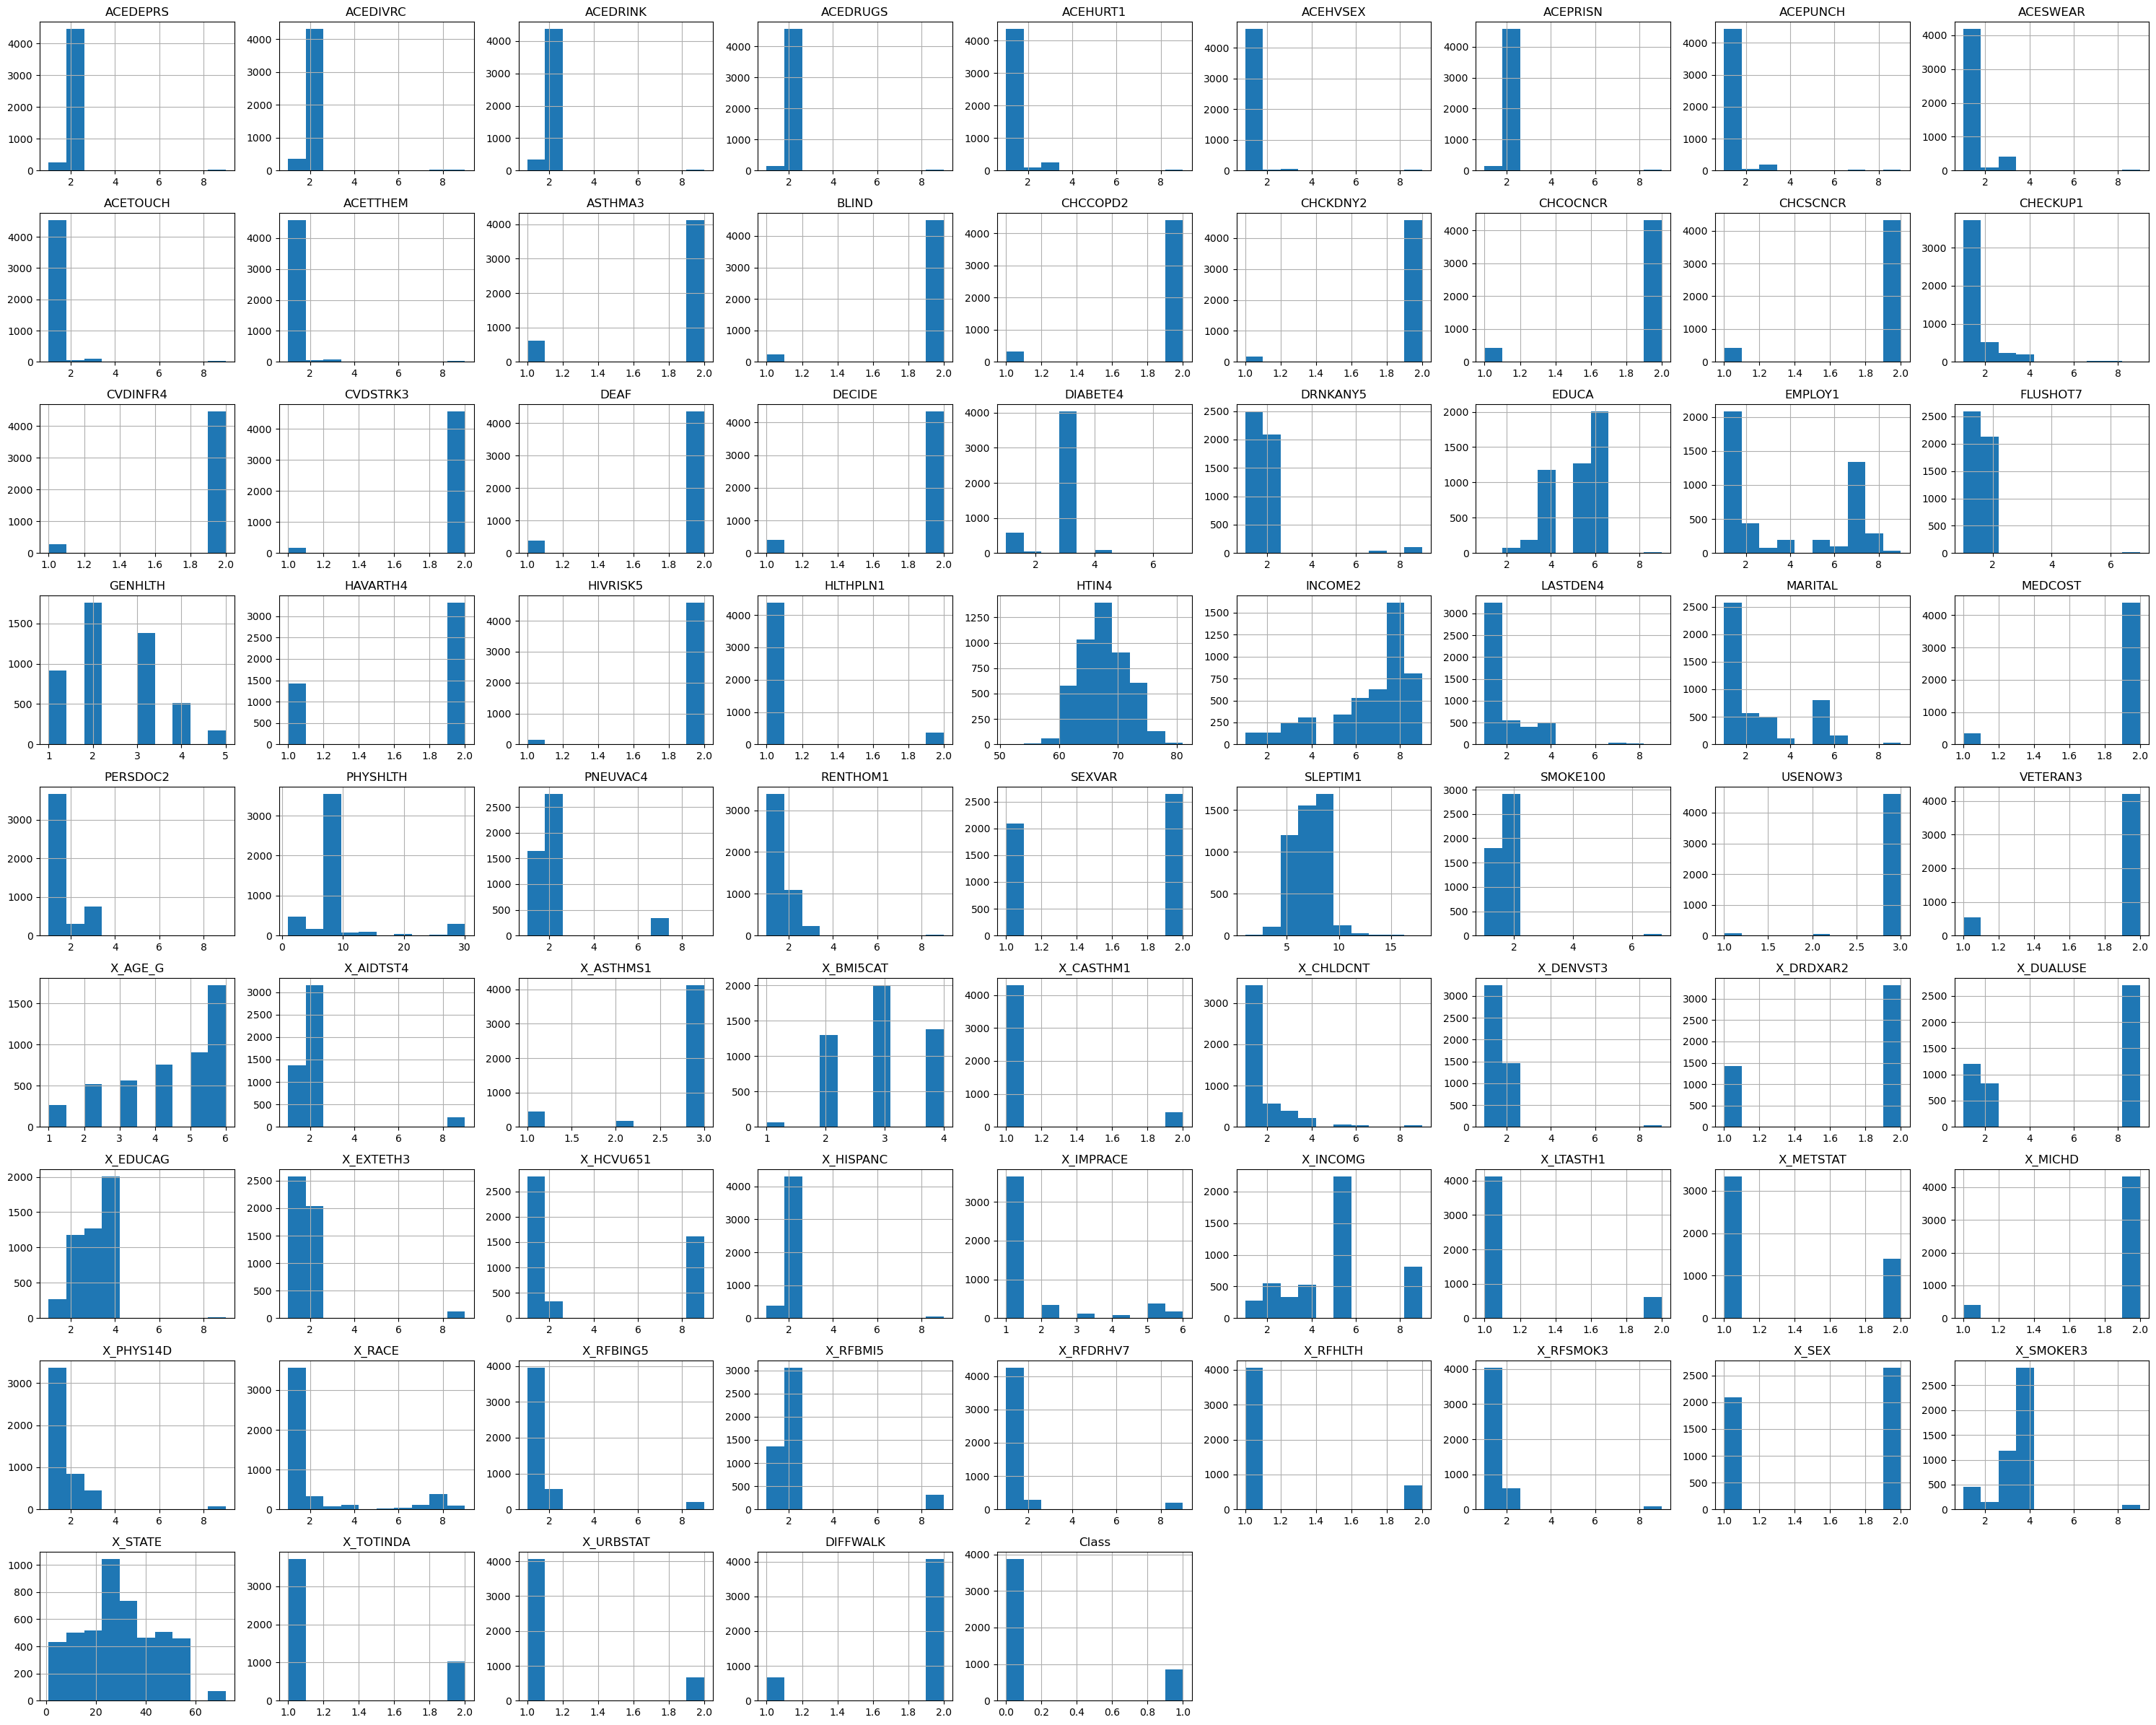

In [30]:
import matplotlib.pyplot as plt
# Histograms for all columns, making the figure bigger
cleaned_data.hist(figsize=(30, 24))
plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area.
plt.show()

# Interpretation of the data from Histogram

From the above Histogram we can visualize the data and conlude that there is only one Neumerical Data column and rest of the data are Nominal and Ordinal categorical variables

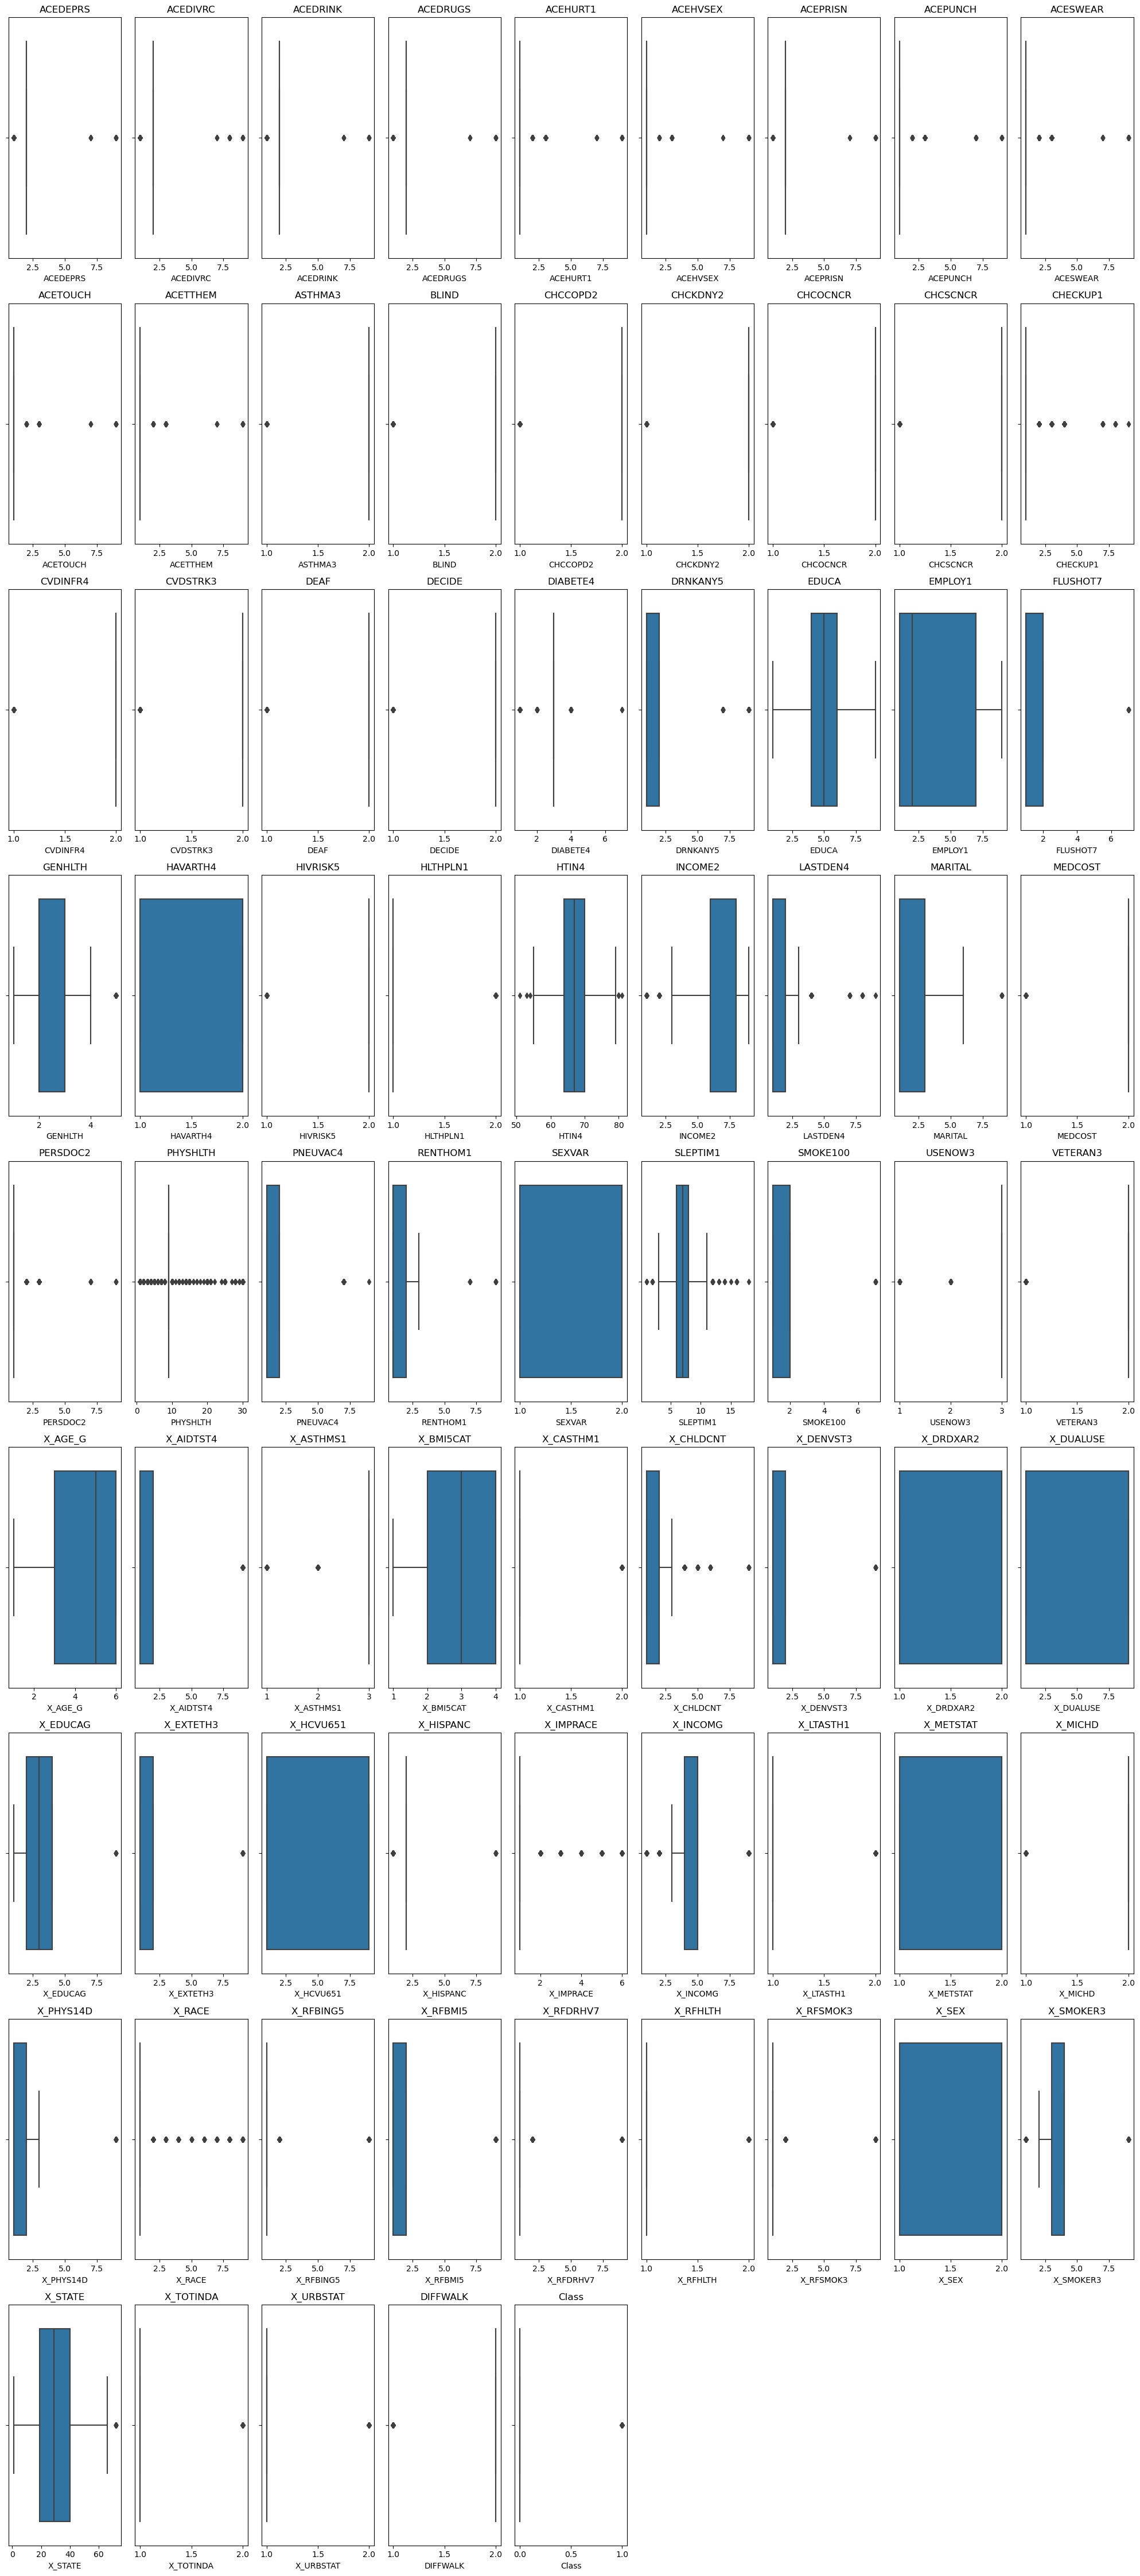

In [31]:
# Assuming your DataFrame is named data
numerical_cols = cleaned_data.select_dtypes(include=np.number).columns

# Determine the size of the grid
n = len(numerical_cols)
ncols = int(np.ceil(np.sqrt(n)))
nrows = int(np.ceil(n / ncols))

# Set the overall figure size to make each subplot medium-sized (adjust as needed)
plt.figure(figsize=(20, nrows * 5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(x=cleaned_data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# Interpretation of the data from box plot

After removing outliers using Z score method there are still few columns having values whisch are not frequent values and assigned as higher numbers so we can not consider those values as outliers

# Pearson correlation coefficient 

Correlation of features with 'Class':
Class        1.000000
GENHLTH      0.213409
X_RFHLTH     0.183101
X_LTASTH1    0.154197
X_PHYS14D    0.150641
               ...   
HAVARTH4    -0.149093
X_DRDXAR2   -0.149093
ASTHMA3     -0.154197
X_ASTHMS1   -0.156250
DECIDE      -0.313920
Name: Class, Length: 77, dtype: float64


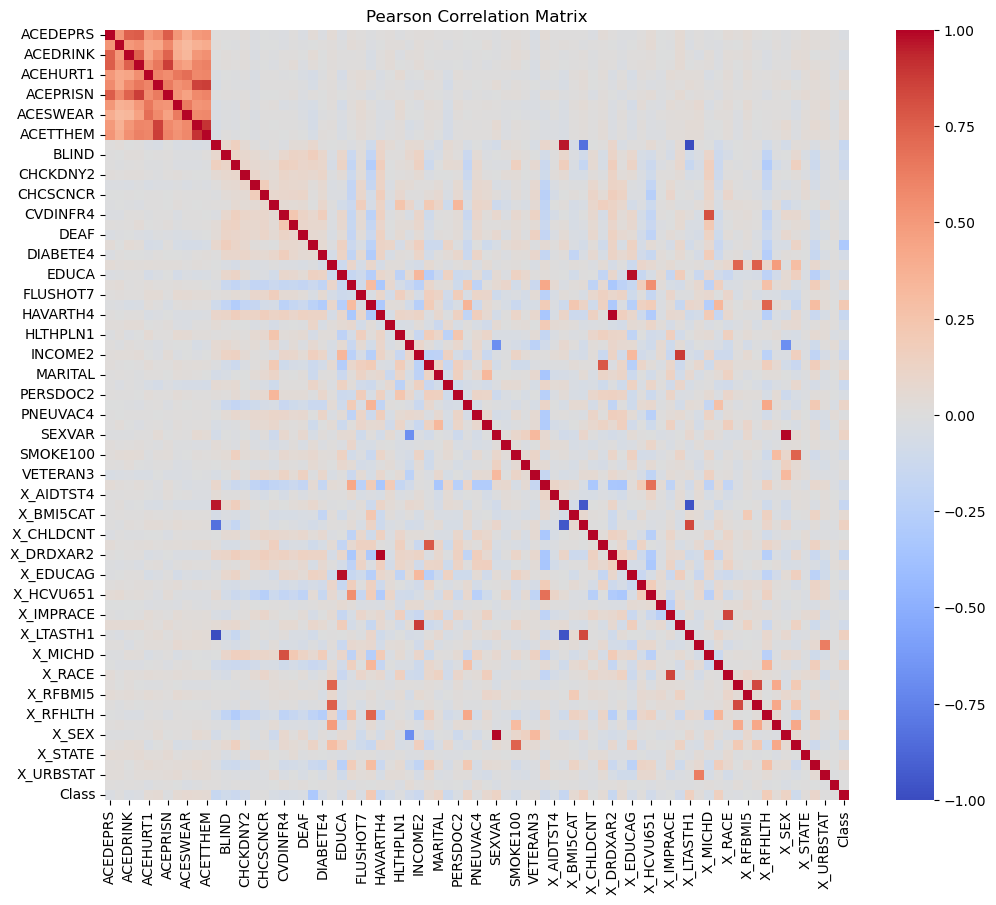

In [32]:
# Calculate Pearson correlation matrix for cleaned_data
correlation_matrix = cleaned_data.corr()

# Focus on correlations of features with the "Class" target variable
class_correlation = correlation_matrix['Class'].sort_values(ascending=False)

# Display correlations of features with the "Class" target variable
print("Correlation of features with 'Class':")
print(class_correlation)

# Visualize the entire correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

In [33]:
class_correlation_list = list(class_correlation.items())

print("Correlation of features with 'Class':")
for feature, correlation in class_correlation_list:
    if feature != 'Class':  # Exclude the 'Class' to 'Class' correlation
        print(f"{feature}: {correlation}")

Correlation of features with 'Class':
GENHLTH: 0.2134088170224428
X_RFHLTH: 0.18310092469384556
X_LTASTH1: 0.15419674007278397
X_PHYS14D: 0.1506412504087471
X_CASTHM1: 0.14401778618503625
X_SEX: 0.12881558873951907
SEXVAR: 0.12810375114733002
PHYSHLTH: 0.11628427721666579
MARITAL: 0.10571166579776202
X_TOTINDA: 0.10035427833914427
EMPLOY1: 0.08476156412650689
RENTHOM1: 0.07768635999303053
ACESWEAR: 0.06727249061111937
ACETOUCH: 0.05732491465925126
X_BMI5CAT: 0.05572588321154804
ACEPUNCH: 0.05411656178963261
LASTDEN4: 0.051986638285468255
ACEHVSEX: 0.050404233120822935
X_DUALUSE: 0.04727644557137949
ACETTHEM: 0.046975588381487486
ACEHURT1: 0.04498131259901067
X_DENVST3: 0.0405503899213918
X_RFSMOK3: 0.03453043075869049
X_STATE: 0.021688425540137658
X_METSTAT: 0.017264313012861927
VETERAN3: 0.016583121355071003
X_EXTETH3: 0.011250115211518173
USENOW3: 0.010229927122245778
ACEDIVRC: 0.006535892347631296
DRNKANY5: 0.00636591166576133
DIFFWALK: 0.006228268541732277
CHCSCNCR: 0.0043495310920

# Near_zero_variance and Highly correlated features

In [34]:
import pandas as pd
from rich.console import Console

# Assuming 'cleaned_data' is your DataFrame and includes the 'Class' column

# Compute the correlation matrix
correlation_matrix = cleaned_data.corr()

# Extract the correlation values for the 'Class' column
class_correlation = correlation_matrix['Class']

# Separate positive and negative correlations with 'Class'
positive_correlations = class_correlation[class_correlation > 0.1]
negative_correlations = class_correlation[class_correlation < -0.1]

# Convert the filtered Series into lists of tuples for positive and negative correlations
positive_correlation_list = [(feature, correlation) for feature, correlation in positive_correlations.items() if feature != 'Class']
negative_correlation_list = [(feature, correlation) for feature, correlation in negative_correlations.items() if feature != 'Class']

# Create a console object
console = Console()

console.print("Features with more than 10% positive correlation with 'Class':", style="blue")
for feature, correlation in positive_correlation_list:
    console.print(f"{feature}: {correlation}", style="blue")

console.print("\nFeatures with more than 10% negative correlation with 'Class':", style="red")
for feature, correlation in negative_correlation_list:
    console.print(f"{feature}: {correlation}", style="red")

Features with more than 10% positive correlation with 'Class':

GENHLTH: 0.2134088170224428

MARITAL: 0.10571166579776202

PHYSHLTH: 0.11628427721666579

SEXVAR: 0.12810375114733002

X_CASTHM1: 0.14401778618503625

X_LTASTH1: 0.15419674007278397

X_PHYS14D: 0.1506412504087471

X_RFHLTH: 0.18310092469384556

X_SEX: 0.12881558873951907

X_TOTINDA: 0.10035427833914427

Features with more than 10% negative correlation with 'Class':

ASTHMA3: -0.15419674007278397

CHCCOPD2: -0.1258183104365814

DECIDE: -0.31391955164609064

HAVARTH4: -0.14909321656559624

INCOME2: -0.13280578458342499

MEDCOST: -0.1183599769791611

X_ASTHMS1: -0.15625002809140115

X_DRDXAR2: -0.14909321656559624

X_SMOKER3: -0.10707747493267215

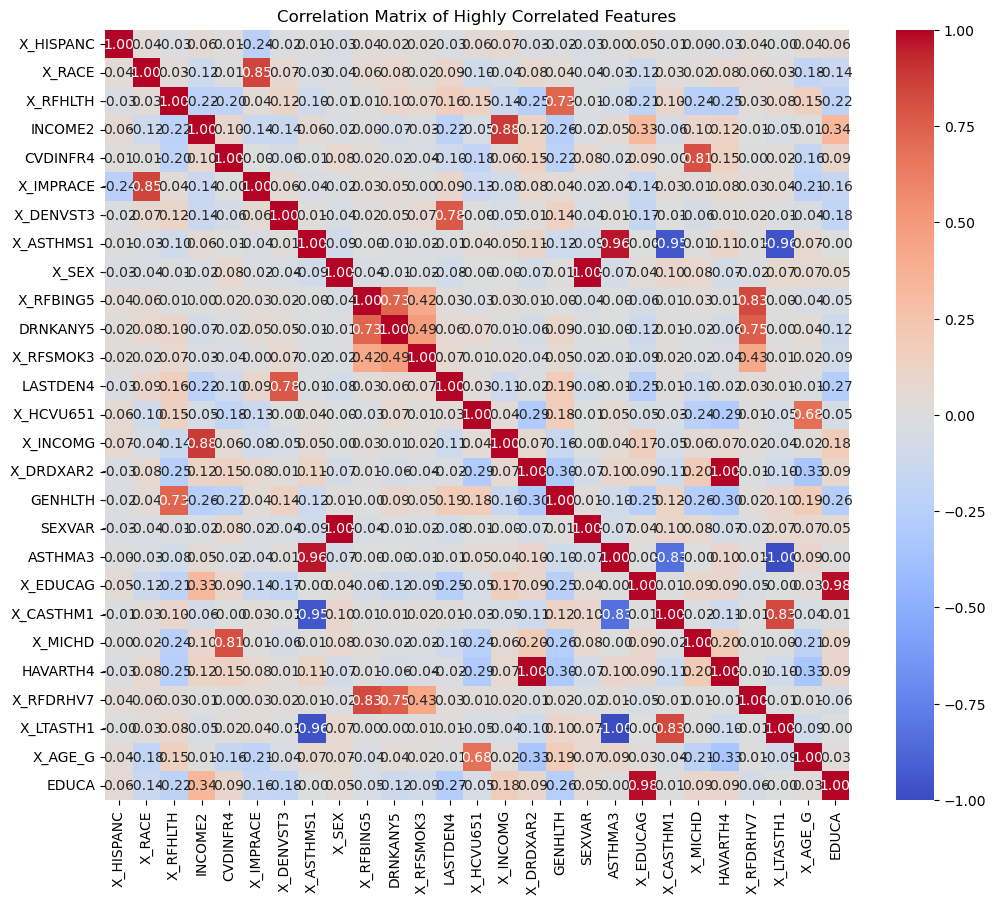

In [38]:
# Visualize the correlation matrix of the highly correlated features
corr_matrix = cleaned_data[['X_HISPANC', 'X_RACE', 'X_RFHLTH', 'INCOME2', 'CVDINFR4', 'X_IMPRACE', 'X_DENVST3', 'X_ASTHMS1', 'X_SEX', 'X_RFBING5', 'DRNKANY5', 'X_RFSMOK3', 'LASTDEN4', 'X_HCVU651', 'X_INCOMG', 'X_DRDXAR2', 'GENHLTH', 'SEXVAR', 'ASTHMA3', 'X_EDUCAG', 'X_CASTHM1', 'X_MICHD', 'HAVARTH4', 'X_RFDRHV7', 'X_LTASTH1', 'X_AGE_G', 'EDUCA']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Highly Correlated Features')
plt.show()

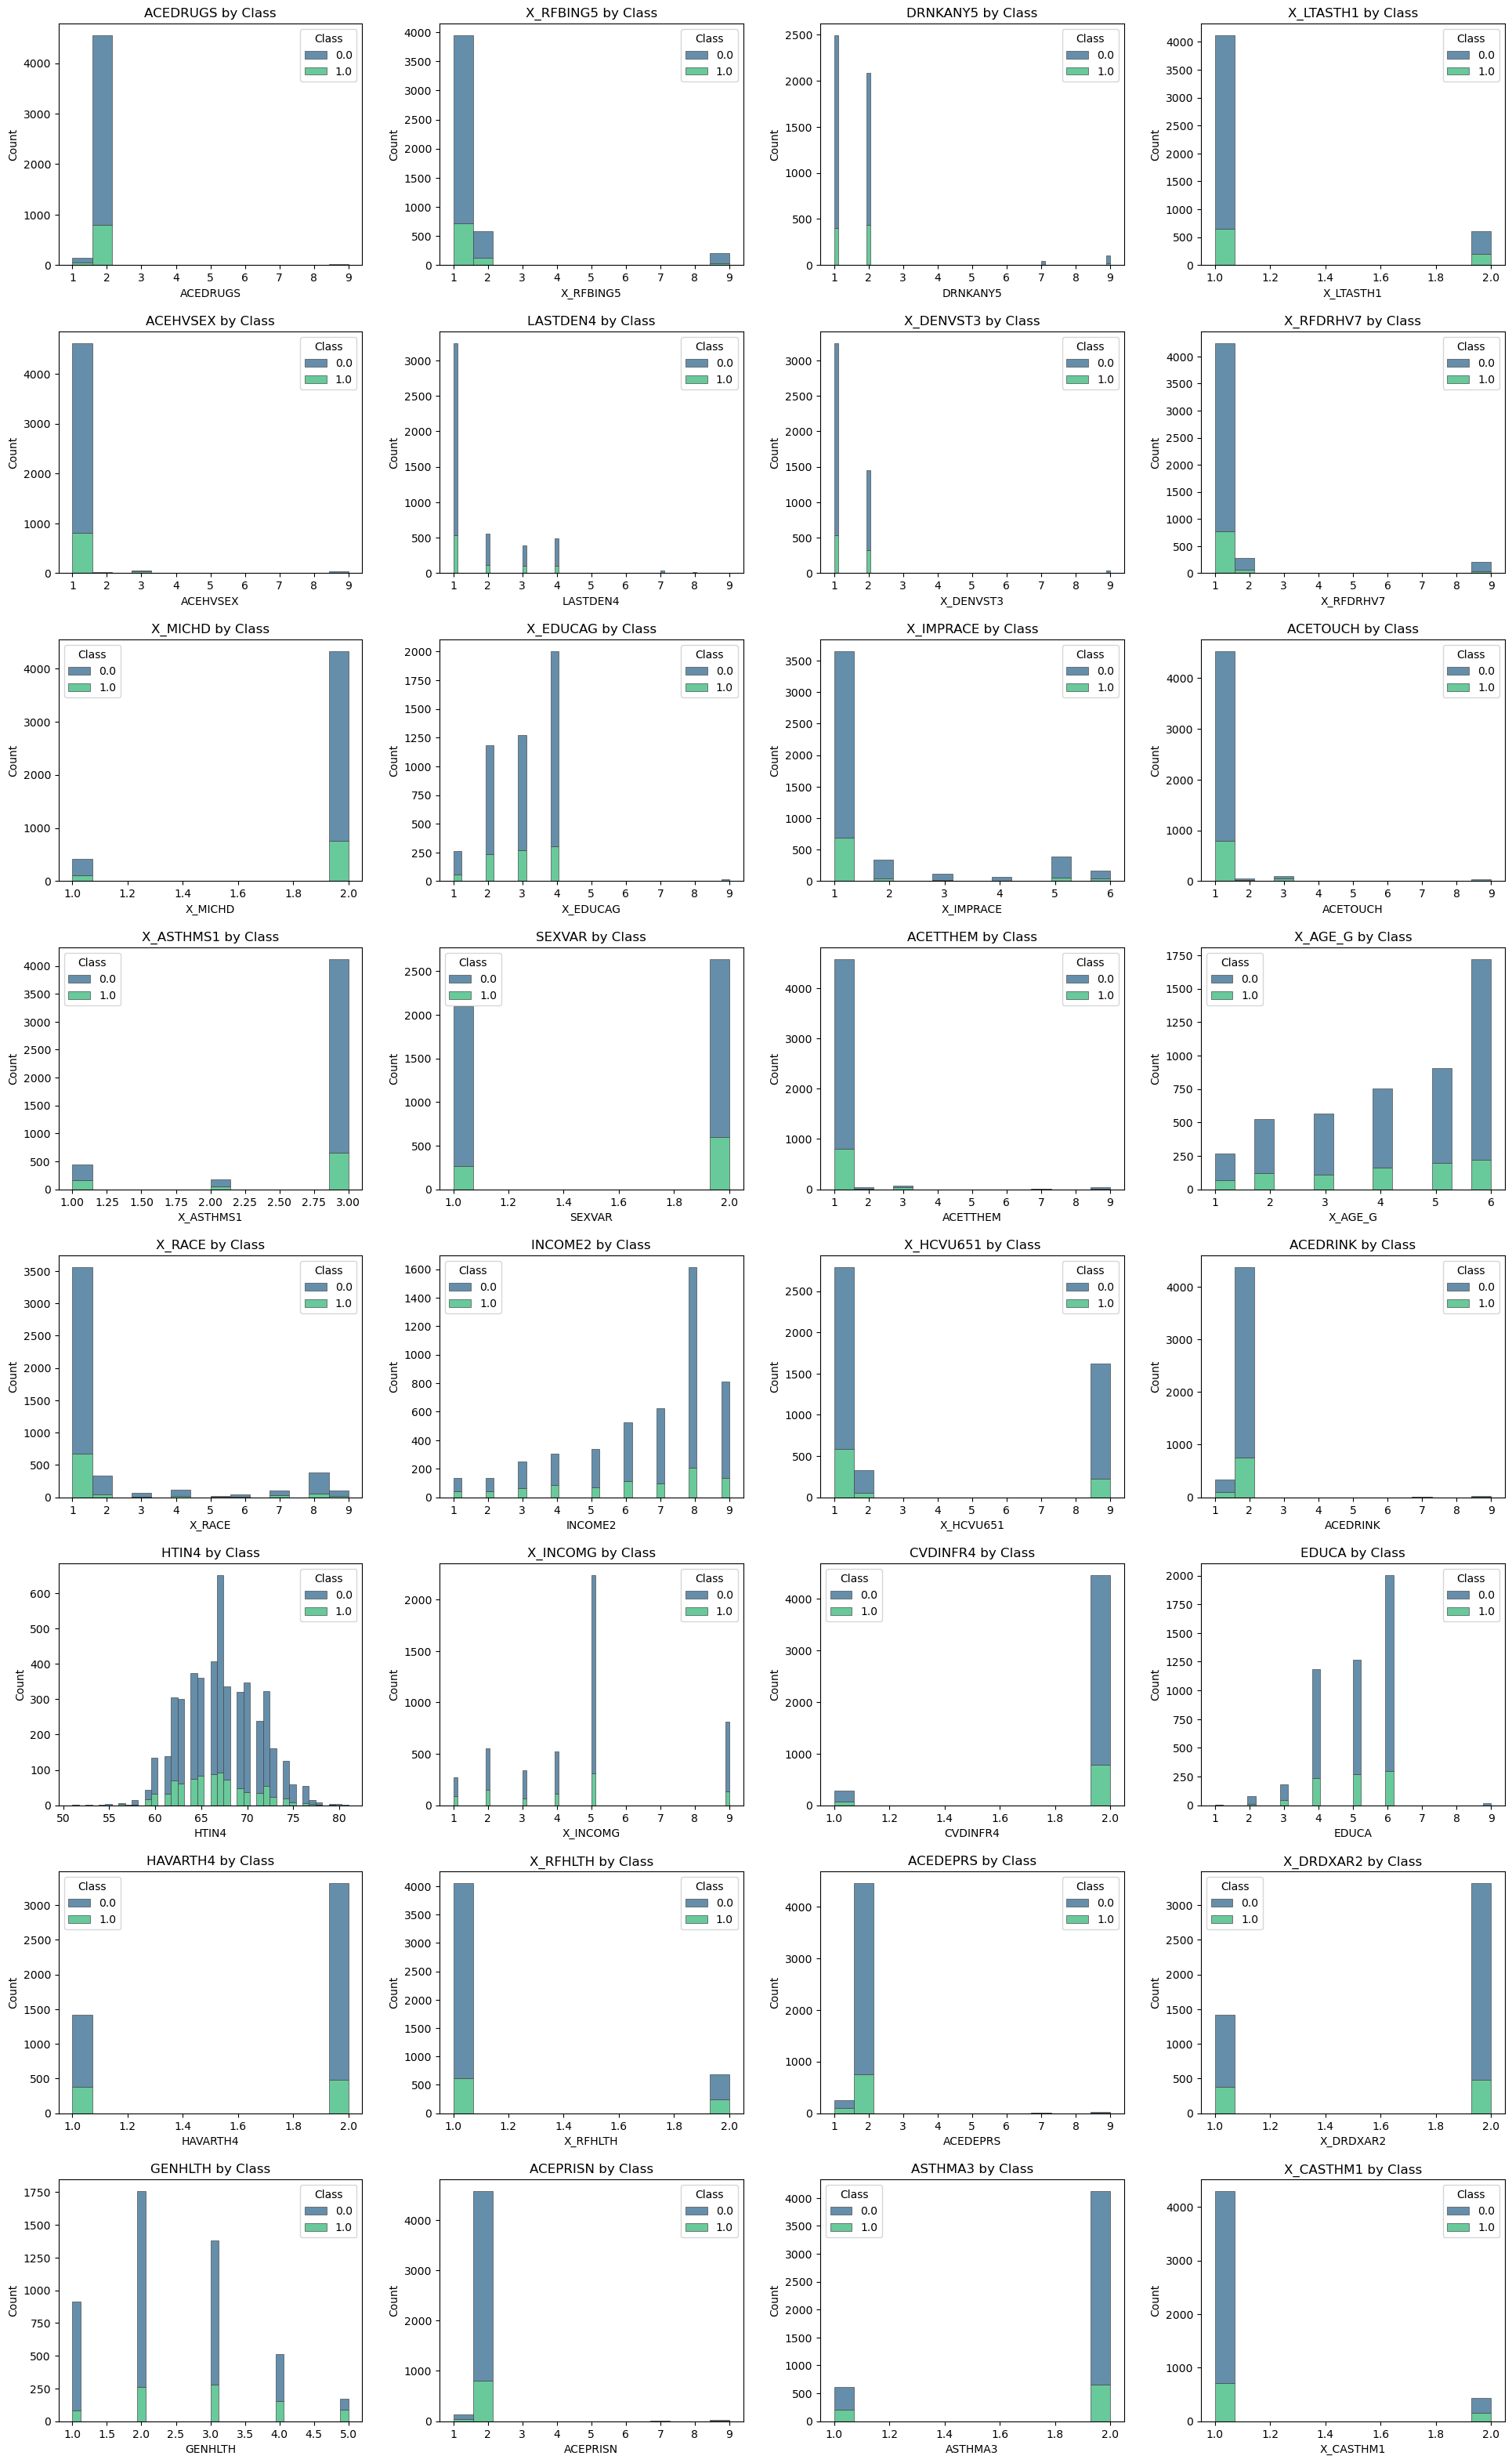

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt


columns = ['ACEDRUGS', 'X_RFBING5', 'DRNKANY5', 'X_LTASTH1', 'ACEHVSEX', 'LASTDEN4', 'X_DENVST3', 'X_RFDRHV7', 'X_MICHD', 'X_EDUCAG', 'X_IMPRACE', 'ACETOUCH', 'X_ASTHMS1', 'SEXVAR', 'ACETTHEM', 'X_AGE_G', 'X_RACE', 'INCOME2', 'X_HCVU651', 'ACEDRINK', 'HTIN4', 'X_INCOMG', 'CVDINFR4', 'EDUCA', 'HAVARTH4', 'X_RFHLTH', 'ACEDEPRS', 'X_DRDXAR2', 'GENHLTH', 'ACEPRISN', 'ASTHMA3', 'X_CASTHM1']

# Determine the layout of the subplot grid
n = len(columns)  # Number of variables to plot
ncols = 4  # Number of columns in the grid
nrows = n // ncols + (n % ncols > 0)  # Number of rows in the grid, ensuring all plots fit

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 4))  # Adjust figure size as needed
fig.tight_layout(pad=4.0)  # Add space between plots

# Loop through the variables and create a subplot for each
for i, col in enumerate(columns):
    ax = axes.flatten()[i]
    sns.histplot(data=cleaned_data, x=col, hue='Class', multiple='stack', palette='viridis', edgecolor='.3', linewidth=.5, ax=ax)
    ax.set_title(f'{col} by Class')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# If the number of plots is not a perfect multiple of ncols, hide the empty subplots
for j in range(i + 1, nrows * ncols):
    axes.flatten()[j].set_visible(False)

plt.show()

# Interpretability

1. **ACEDRUGS by Class**:
   - This histogram shows that the majority of observations for the variable 'ACEDRUGS' have a low value (close to 0), for both classes (0.0 and 1.0).
   - There's a stark contrast in the distribution of 'ACEDRUGS' between the two classes, with Class 0.0 having significantly more observations with low 'ACEDRUGS' values.

2. **X_RFBING5 by Class**:
   - Similar to 'ACEDRUGS', the 'X_RFBING5' variable also shows a concentration of observations at the lower end of the scale, predominantly for Class 0.0.
   - The count for Class 1.0 is visibly lower across all values of 'X_RFBING5', suggesting that there are fewer observations of Class 1.0 with these behaviors or characteristics.

3. **ACEHVSEX by Class**:
   - The 'ACEHVSEX' variable's distribution is heavily skewed towards the lower values for both classes, indicating that high values for this variable are rare or less common in the dataset.
   - As with the previous variables, Class 0.0 seems to have a higher count of low-value observations compared to Class 1.0.

4. **LASTDEN4 by Class**:
   - The 'LASTDEN4' variable also shows a concentration of low values, particularly for Class 0.0.
   - Observations in Class 1.0 are again fewer in number across the 'LASTDEN4' values.

# Checking the important features from main dataframe that may have some correlation with class lable and if so adding it to cleaned dataframe 

In [40]:
import pandas as pd

# Replace 'Y' with 1 and 'N' with 0 in the 'Class' column
df['Class'] = df['Class'].replace({'Y': 1, 'N': 0})

# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation values for the 'Class' column
class_correlation = correlation_matrix['Class']

# Filter features with correlation value more than 10% (either positive or negative)
significant_correlation = class_correlation[(class_correlation > 0.1) | (class_correlation < -0.1)]

# Convert the filtered Series into a list of tuples (feature_name, correlation_value)
significant_correlation_list = list(significant_correlation.items())

# Print the list
print("Features with more than 10% correlation with 'Class':")
for feature, correlation in significant_correlation_list:
    print(f"{feature}: {correlation}")

Features with more than 10% correlation with 'Class':
ACESWEAR: 0.11591522921836273
ASTHMA3: -0.1307921866534498
BIRTHSEX: 0.10433902792376461
CASTHNO2: -0.14761367773766182
CDASSIST: -0.1903750401369049
CDDISCUS: -0.2857142857142858
CDHELP: -0.23735633163877065
CDSOCIAL: 0.11412740796336569
CELLSEX: 0.16002610128624903
CNCRAGE: -0.1424618425215105
CRGVHOU1: -0.1163793103448277
CRGVLNG1: -0.19193494255211513
CRGVREL4: 0.14574844364543188
CSRVCTL2: -0.14585425389314685
CSRVDEIN: 0.10401616542905706
CSRVSUM: 0.18953017420899268
Class: 1.0
DECIDE: -0.11681235670157121
DIABEYE: -0.10848967934553834
DIFFWALK: -0.1054010429076759
ECIGARET: -0.1327289565473025
FALL12MN: -0.14918793186908488
FALLINJ4: -0.14691503497106387
GENHLTH: 0.20582592831542187
HAVARTH4: -0.10525108458499155
HAVEHEPB: 0.1314236882182804
HAVEHEPC: 0.5570860145311555
LCSCTSCN: 0.11023185871991432
LCSFIRST: -0.10113573184022233
PHYSHLTH: -0.18551386287295824
RESPSLCT: 0.11717010574338509
SEXVAR: 0.1405822713980175
SMOKDAY2:

### From the above I observed that only 'DIFFWALK' column is missing from the cleaned_data so we can add that column to the cleaned data above

# Creating a csv file called preprocessing_data.csv

In [41]:
# Save the cleaned DataFrame to a new CSV file
cleaned_data.to_csv('preprocessing_data.csv', index=False)

print("The file 'preprocessing_data.csv' has been created successfully.")

The file 'preprocessing_data.csv' has been created successfully.


In [42]:
new_df = pd.read_csv('preprocessing_data.csv')
new_df

,ACEDEPRS,ACEDIVRC,ACEDRINK,ACEDRUGS,ACEHURT1,ACEHVSEX,ACEPRISN,ACEPUNCH,ACESWEAR,ACETOUCH,...,X_RFDRHV7,X_RFHLTH,X_RFSMOK3,X_SEX,X_SMOKER3,X_STATE,X_TOTINDA,X_URBSTAT,DIFFWALK,Class
0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,1.0,0.0
1,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,0.0
2,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
3,1.0,2.0,1.0,1.0,3.0,3.0,1.0,3.0,3.0,3.0,...,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0
4,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4731,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,4.0,27.0,1.0,1.0,2.0,0.0
4732,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,4.0,27.0,1.0,1.0,2.0,0.0
4733,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,4.0,27.0,1.0,1.0,2.0,0.0
4734,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,4.0,27.0,1.0,1.0,1.0,0.0
